<a href="https://colab.research.google.com/github/MarcosVel/statistics-for-devs/blob/main/Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício do módulo

Com base nas aulas do módulo de Estatística, utilize os métodos da biblioteca Pandas para tratar o dicionário abaixo e:
- Trazer a média das vendas
- Criar um gráfico de barras vertical mostrando o mês de referência e o valor
- Criar um gráfico de linhas mostrando o mês de referência e o valor.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dict_faturamento = {
    'data_ref': [
        '2023-01-01',
        '2020-02-01',
        '2021-03-01',
        '2022-04-01',
        '2023-05-01',
        '2023-06-01',
        '2020-07-01',
        '2021-08-01',
        '2022-09-01',
        '2023-10-01',
        '2022-11-01',
        '2023-12-01',
        ],
    'valor': [
        400000,
        890000,
        760000,
        430000,
        920000,
        340000,
        800000,
        500000,
        200000,
        900000,
        570000,
        995000,
        ]
}

In [25]:
df = pd.DataFrame.from_dict(dict_faturamento)
df

,data_ref,valor
0,2023-01-01,400000
1,2020-02-01,890000
2,2021-03-01,760000
3,2022-04-01,430000
4,2023-05-01,920000
5,2023-06-01,340000
6,2020-07-01,800000
7,2021-08-01,500000
8,2022-09-01,200000
9,2023-10-01,900000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   data_ref  12 non-null     object
 1   valor     12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [6]:
df.describe()

,valor
count,12.000000
mean,642083.333333
std,267015.988058
min,200000.000000
25%,422500.000000
50%,665000.000000
75%,892500.000000
max,995000.000000


### Média das vendas

In [7]:
df['valor'].mean()

642083.3333333334

### Criando um gráfico de barras vertical mostrando o mês de referência e o valor

In [26]:
# transform a coluna em datetime com mes e ano
df['data_ref'] = pd.to_datetime(df['data_ref']).dt.strftime('%Y-%m')
df

,data_ref,valor
0,2023-01,400000
1,2020-02,890000
2,2021-03,760000
3,2022-04,430000
4,2023-05,920000
5,2023-06,340000
6,2020-07,800000
7,2021-08,500000
8,2022-09,200000
9,2023-10,900000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   data_ref  12 non-null     object
 1   valor     12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [31]:
df['valor'] = (df['valor'] // 1000).astype(int)
df

,data_ref,valor
1,2020-02,890
6,2020-07,800
2,2021-03,760
7,2021-08,500
3,2022-04,430
8,2022-09,200
10,2022-11,570
0,2023-01,400
4,2023-05,920
5,2023-06,340


In [27]:
# order by month
df = df.sort_values('data_ref')
df

,data_ref,valor
1,2020-02,890000
6,2020-07,800000
2,2021-03,760000
7,2021-08,500000
3,2022-04,430000
8,2022-09,200000
10,2022-11,570000
0,2023-01,400000
4,2023-05,920000
5,2023-06,340000


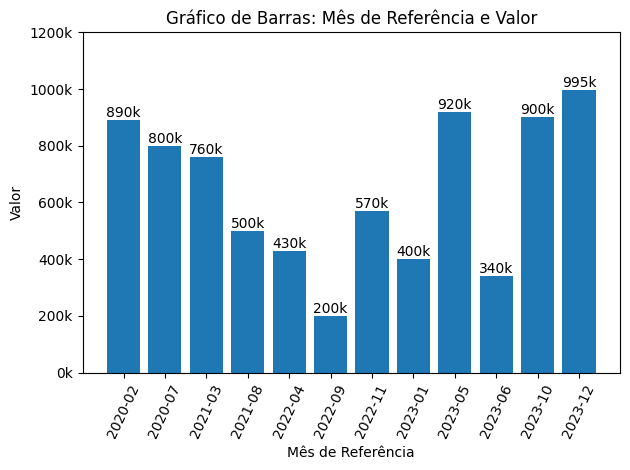

In [46]:
plt.bar(df['data_ref'], df['valor'])
plt.title('Gráfico de Barras: Mês de Referência e Valor')
plt.xlabel('Mês de Referência')
plt.ylabel('Valor')
plt.xticks(rotation=65)
current_ticks = plt.yticks()[0]  # Get current y-tick values
plt.yticks(current_ticks, [f'{int(tick)}k' for tick in current_ticks])

for index, value in enumerate(df['valor']):
    plt.text(index, value, f'{value}k', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Criando um gráfico de linhas mostrando o mês de referência e o valor